# TP Informatique n°3

## Exercice 1 - Utilisation de la bibliothèque matplotlib
### Un premier exemple

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
n = 20

In [4]:
x = [k*10/n for k in range(n)]

In [5]:
y = [np.sin(k*10/n) for k in range(n)]

In [6]:
type(x), type(y)

(list, list)

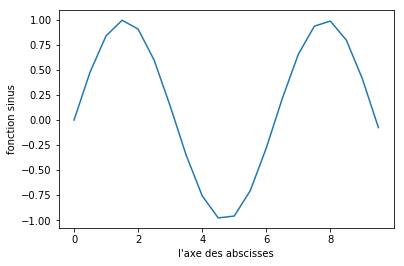

In [7]:
plt.plot(x, y)
plt.ylabel('fonction sinus')
plt.xlabel("l'axe des abscisses")
plt.show()

`x` est une liste.

On trace ici la fonction à l'aide d'une liste d'abscisses et d'une liste d'ordonnées de même longueur ; Python dessine une ligne brisée entre les points décrits par ces deux listes.

Le tracé ne va pas jusqu'à $x = 10$ car dans la structure `for k in range(n)`, la dernière valeur prise par `k` est $n-1$, donc la dernière valeur prise par `x` est $\frac{19}{2}$. 

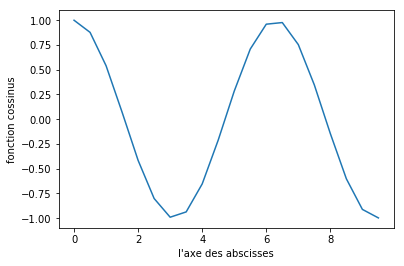

In [8]:
plt.plot(x, np.cos(x))
plt.ylabel('fonction cossinus')
plt.xlabel("l'axe des abscisses")
plt.show()

### Première amélioration

In [9]:
help(np.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

In [10]:
x = np.linspace(0, 10, 20)

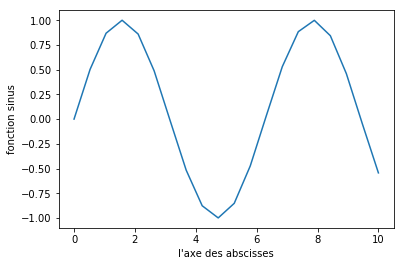

In [11]:
plt.plot(x, np.sin(x))
plt.ylabel('fonction sinus')
plt.xlabel("l'axe des abscisses")
plt.show()

### Compléments

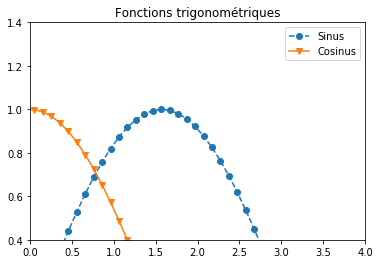

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)
plt.plot(x, np.sin(x), marker='o', linestyle='--', label="Sinus")
plt.plot(x, np.cos(x), marker='v', label="Cosinus")
plt.title("Fonctions trigonométriques")
plt.axis ([0, 4, 0.4, 1.4])
plt.legend ()
plt.show ()

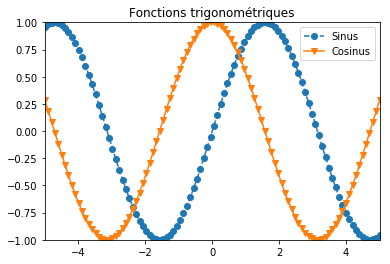

In [13]:
import matplotlib.pyplot as plt
import numpy as np

xmin = -5
xmax = 5
ymin =-1
ymax = 1
x = np.linspace(xmin, xmax, 100)
plt.plot(x, np.sin(x), marker='o', linestyle='--', label="Sinus")
plt.plot(x, np.cos(x), marker='v', label="Cosinus")
plt.title("Fonctions trigonométriques")
plt.axis ([xmin, xmax, ymin, ymax])
plt.legend ()
plt.show ()

In [14]:
def transitoire(A):
    '''Trace la fonction t -> A(1-exp(-t/tau)) pour tau=2 sur l'intervalle [0, 10]'''
    tau = 2
    X = np.linspace(0, 10)
    Y = [A*(1-np.exp(-x/tau)) for x in X]
    plt.plot(X, Y)
    plt.title("Transitoire")
    plt.show()    

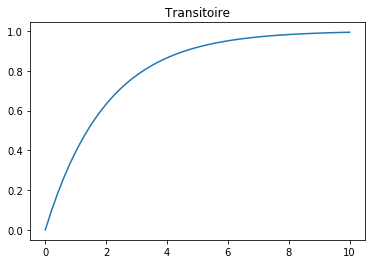

In [15]:
transitoire(1)

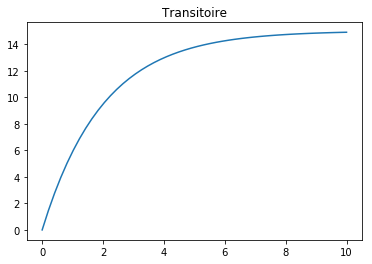

In [16]:
transitoire(15)

Pour tracer une droite, on n'a besoin que de deux points.

Les deux droites se croisent pour $t$ tel que $\frac{At}{\tau} = A$, donc pour $t = \tau$.

In [17]:
def transitoire(A):
    '''Trace la fonction t -> A(1-exp(-t/tau)) pour tau=2 sur l'intervalle [0, 10]'''
    tau = 2
    X = np.linspace(0, 10)
    Y = [A*(1-np.exp(-x/tau)) for x in X]
    plt.plot(X, Y)
    
    # Tracé de la tangente en 0
    plt.plot([0, 1.1*tau], [0, 1.1*A])
    # Tracé de l'asymptote
    plt.plot([0, 10], [A, A])
    
    plt.title("Transitoire")
    plt.show()  

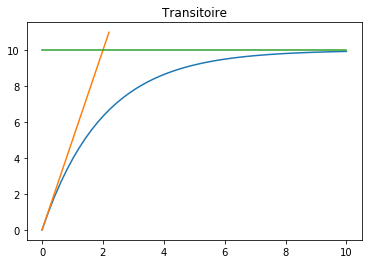

In [18]:
transitoire(10)

## Exercice 2 - De l’importance de l’échantillonnage

In [19]:
import matplotlib.pyplot as plt
import numpy as np
f1 = 1e3
f2 = 10*f1

La suite de l'énoncé amenant à faire plusieurs fois le tracé avec un nombre de points différent, on écrit une fonction qui réalise le tracé et qui prend en paramètre le nombre de points.

In [20]:
def somme_sinusoide(n):
    t = np.linspace(0, 1/f1, n)
    s1 = np.cos(2*np.pi*f1*t)
    s2 = np.cos(2*np.pi*f2*t)
    plt.plot(t, s1, linestyle='--',marker='.', label = "s1")
    plt.plot(t, s2, linestyle='dotted', marker="x", label="s2")
    plt.plot(t, s1 + s2, label="s")
    plt.xlabel("t")
    plt.ylabel("s(t)")
    plt.legend()
    plt.show()  
    # return None

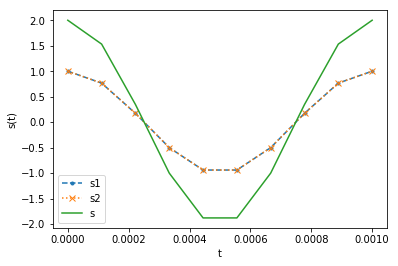

In [21]:
somme_sinusoide(10)

On remarque que $s_1$ et $s_2$ sont superposés. On devrait voir dix périodes du signal $s_2$, mais la fréquence d'échantillonage est trop faible.

D'après le critère de Shannon, il faut choisir $f_{ech} > 20 f_1$, donc $\tau_{ech} < \frac{1}{20f_1}$.

L'écart entre deux points du tracé avec $n$ points étant $\frac{1}{(n-1)f_1}$, il faut donc choisir $n > 21$.

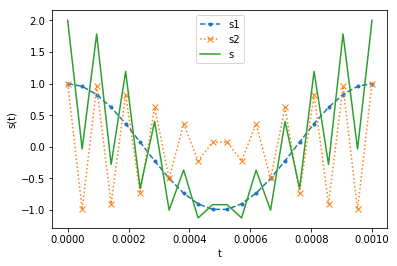

In [22]:
somme_sinusoide(22)

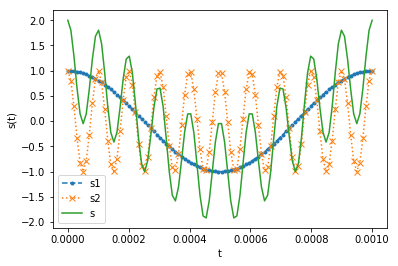

In [23]:
somme_sinusoide(100)

Dans le cas où $f_2 = f_1 + \delta f$ avec $\delta f$ petit devant $f_1$, la période de l'enveloppe est $\frac{1}{\delta f}$.

La fréquence d'échantillonnage doit vérifier $f_{ech} > 2 f_m$, donc le nombre de points $n_{ech}$ doit vérifier $(n_{ech}-1)\delta f > 2 f_m$, soit encore $n_{ech} > \frac{2 f_m}{\delta f} + 1$.

In [24]:
def battement(f1, df):
    f2 = f1 + df
    fm = (f1 + f2)/2
    
    T = 1/df
    
    n = int(2*fm/df) + 2
    
    t = np.linspace(0, T, n)
    
    s1 = np.cos(2*np.pi*f1*t)
    s2 = np.cos(2*np.pi*f2*t)
    
    plt.plot(t, s1 + s2)
    plt.xlabel("t")
    plt.ylabel("s(t)")

    plt.savefig("battement.png")  

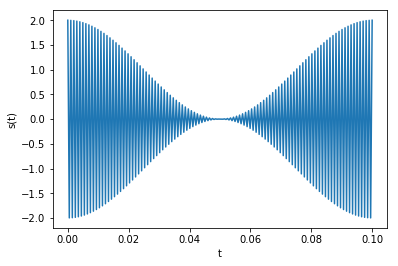

In [25]:
battement(1e3, 10)